In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df_dict = pd.read_excel("TICKETS.xlsx", sheet_name=None) 
print(df_dict.keys())  
df = df_dict['TicketBookings']
df.tail() 

dict_keys(['Masters', 'TicketBookings'])


,Starting Point,Destination,Booked Before Days,Month of Travel,Number of travellers,Number of previous cancellations,Festival,Class of Train,Class of Ticket,Untoward Incidents,State of Travellers,Weekday of Travel,Cancelled Or Not
60061,Mumbai CST,Kannur,71,April,3,3,Onam,Garib Rath,Second Sleeper,NaN,Kerala,Thursday,False
60062,Udupi,Chiplun,48,September,4,3,NaN,Superfast,Second Sleeper,Heavy Rain,Karnataka,Friday,True
60063,Panvel,Badagara,94,February,5,2,Bakrid,Express,First AC Coupe,Tempest,Kerala,Wedensday,False
60064,Thrissur,Khed,74,June,7,2,Ramzan,Superfast,Second AC Economy,NaN,Tamilnadu,Friday,False
60065,Kollam,Bhatkal,43,December,3,2,Christmas,Jan Satabdi,Second Sleeper,NaN,Goa,Sunday,False


In [3]:
df.shape

(60066, 13)

In [4]:
df2 = df.drop(["Festival","Untoward Incidents","Weekday of Travel","Class of Ticket","Destination","Starting Point","Booked Before Days","Number of previous cancellations","Number of travellers"],axis =1)
df2.head()

,Month of Travel,Class of Train,State of Travellers,Cancelled Or Not
0,July,Jan Satabdi,Kerala,False
1,July,Jan Satabdi,Tamilnadu,True
2,February,Express,Karnataka,True
3,February,Garib Rath,Gujarat,False
4,October,Rajadhani,Karnataka,False


In [7]:
df2 = df2.dropna(subset=["Cancelled Or Not"])
df2["Cancelled Or Not"] = df2["Cancelled Or Not"].astype(int)

In [8]:
df_clean = df2.drop_duplicates(subset=["Month of Travel","Class of Train", "State of Travellers"])
df_clean.head()

,Month of Travel,Class of Train,State of Travellers,Cancelled Or Not
0,July,Jan Satabdi,Kerala,0
1,July,Jan Satabdi,Tamilnadu,1
2,February,Express,Karnataka,1
3,February,Garib Rath,Gujarat,0
4,October,Rajadhani,Karnataka,0


In [9]:
df_clean.shape

(360, 4)

In [10]:
for col in ["Month of Travel", "Class of Train", "State of Travellers"]:
    df2[col] = df2[col].fillna(df[col].mode()[0])

In [11]:
X = df_clean[["Month of Travel", "Class of Train", "State of Travellers"]]
y = df_clean["Cancelled Or Not"]

In [12]:
X_encoded = pd.get_dummies(X, drop_first=True).astype(int)

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [14]:
X_encoded

,Month of Travel_August,Month of Travel_December,Month of Travel_February,Month of Travel_January,Month of Travel_July,Month of Travel_June,Month of Travel_March,Month of Travel_May,Month of Travel_November,Month of Travel_October,Month of Travel_September,Class of Train_Garib Rath,Class of Train_Jan Satabdi,Class of Train_Rajadhani,Class of Train_Superfast,State of Travellers_Gujarat,State of Travellers_Karnataka,State of Travellers_Kerala,State of Travellers_Maharashtra,State of Travellers_Tamilnadu
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1567,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1798,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1812,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        64
           1       0.00      0.00      0.00         8

    accuracy                           0.88        72
   macro avg       0.44      0.49      0.47        72
weighted avg       0.79      0.88      0.83        72

Confusion Matrix:
 [[63  1]
 [ 8  0]]


In [51]:
len(y_test)

72

In [50]:
len(X_train)

288

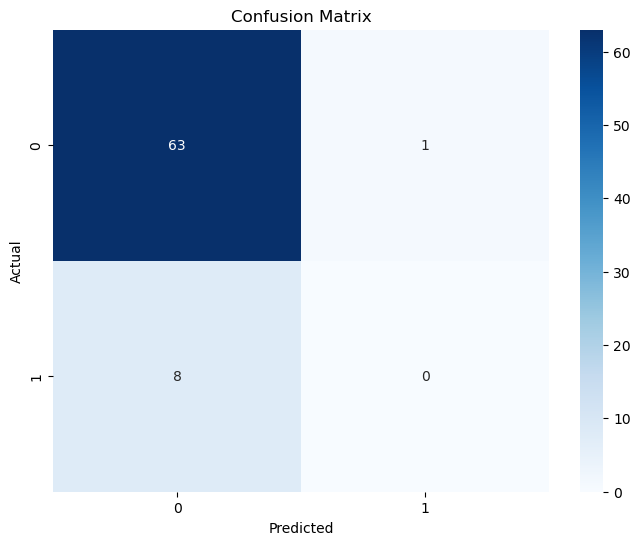

In [16]:
plt.figure(figsize=(8, 6))
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [17]:
sample = pd.DataFrame({
    "Month of Travel": ["July"],
    "Class of Train": ["Jan Satabdi"],
    "State of Travellers": ["Tamilnadu"]
})


In [18]:
sample_encoded = pd.get_dummies(sample)
sample_encoded = sample_encoded.reindex(columns=X_encoded.columns, fill_value=0)
sample_scaled = scaler.transform(sample_encoded)

prediction = model.predict(sample_scaled)
print("Prediction:", "Cancelled" if prediction[0] == 1 else "Not Cancelled")

Prediction: Cancelled


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [27]:
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {
           
        }
    }
}

In [29]:
scores = []

for model_name, mp in models.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_scaled,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
score
        
    

,model,best_score,best_params
0,RandomForest,0.825000,"{'max_depth': 10, 'min_samples_split': 5, 'n_e..."
1,LogisticRegression,0.827778,"{'C': 0.1, 'solver': 'lbfgs'}"
2,SVM,0.830556,"{'C': 1, 'kernel': 'rbf'}"
3,GaussianNB,0.530556,{}


In [42]:
model.score(X_test,y_test)

0.875

In [43]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

In [48]:
sse = []                     
k_rng = range(1, 10)          
for k in k_rng:
    km = KMeans(n_clusters=k)        
    km.fit(X_encoded,y) 
    sse.append(km.inertia_)   
sse

C:\Users\administrator\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\administrator\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\administrator\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\administrator\AppData\Local\anaconda3\Lib\site-packages\sklea

[782.9000000000008,
 714.4999999999991,
 648.4999999999998,
 613.1000000000001,
 570.819593752994,
 554.402369392836,
 528.4428571428572,
 513.7889949676565,
 491.4999999999999]

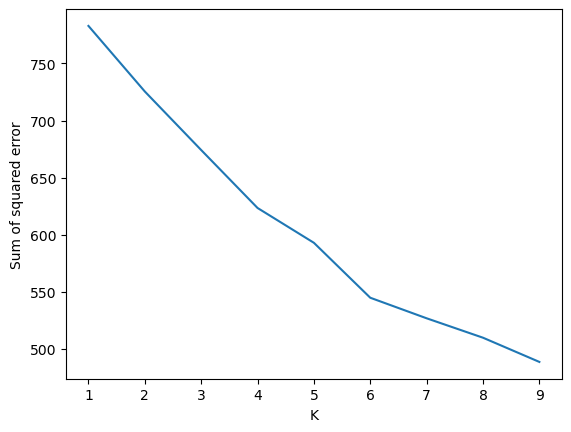

In [40]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [45]:
new_data = pd.read_excel("FutureBookings.xlsx")
new_data.head()

,Starting Point / Destination,Booked Before Days,Month of Travel,Number of travellers,Number of previous cancellations,Festival,Class of Train,Class of Ticket,Untoward Incidents,State of Travellers,Weekday of Travel
0,Trivandrum,1,January,1.0,0.0,NaN,Express,Second Ordinary,Heavy Rain,Kerala,Monday
1,Kollam,2,February,2.0,1.0,NaN,Superfast,Second Sleeper,Cyclone,Karnataka,Tuesday
2,Kottayam,3,March,3.0,2.0,NaN,Rajadhani,Second AC 3 Tier,Tempest,Tamilnadu,Wedensday
3,Alappuzha,4,April,4.0,3.0,NaN,Jan Satabdi,Second AC Economy,Violence,Goa,Thursday
4,Ernakulam,5,May,5.0,NaN,Christmas,Garib Rath,Second AC 2 Tier,Epidemic,Maharashtra,Friday


In [46]:
import pickle 

with open("model_ticket.pkl","wb") as f:
    pickle.dump(model,f)

In [47]:
import pickle

model_columns = X_encoded.columns.tolist()

with open("model_columns_of_ticket.pkl", "wb") as f:
    pickle.dump(model_columns, f)

with open("scaler_of_ticket.pkl", "wb") as f:
    pickle.dump(scaler, f)
